In [44]:
from nilearn import plotting, datasets, surface  
import matplotlib.pyplot as plt
import matplotlib.colors as colors	
import numpy as np 
import SimpleITK as sitk
from scipy import ndimage as ndi

In [3]:
def resample_sitk(input_image, reference_image):
    """
    Resamples a SimpleITK image to match the spacing, 
    size, and orientation of a reference image.
    
    Parameters
    ----------
    input_image  : SimpleITK.Image
        The input image to be resampled.
    reference_image : SimpleITK.Image
        The reference image whose spacing, size, 
        and orientation will be used for resampling.

    Returns
    ---------    
    resampled_image: simpleITK image object 
    
    """
    # Create an identity transform
    identity_transform = sitk.Transform()

    # Define the interpolator to use
    interpolator = sitk.sitkLinear

    # Define the default pixel value for points outside the input image
    defaultPixelValue = 0

    # Define the output pixel type
    outputPixelType = sitk.sitkFloat32

    # Resample the input image
    resampled_image = sitk.Resample(input_image, reference_image, identity_transform, interpolator, defaultPixelValue,
                                    outputPixelType)
    return resampled_image


In [33]:
atlas_Hammers = "Hammers_mith-n30r95-MaxProbMap-gm-MNI152-SPM12.nii.gz"
sitk_atlas_hammers = sitk.ReadImage(atlas_Hammers)

# cambios cerebro control 
cambios_cerebro_control = "Control/synthetic_image_changes.nii.gz"

# read T1 control normalizada
path_T1_control = "Control/T1_Norm_MNI_152_ANTWarped.nii.gz"
sitk_T1_control = sitk.ReadImage(path_T1_control)

# read T1 CEUNIM normal
path_T1_CEUNIM = "ANTs/T1_Norm_MNI_152_ANTWarped.nii.gz"
sitk_T1_CEUNIM = sitk.ReadImage(path_T1_CEUNIM)

# resample Control T1 to Hammers
sitk_T1_control = resample_sitk(sitk_T1_control, sitk_atlas_hammers)
img_T1_control = sitk.GetArrayFromImage(sitk_T1_control)
control_T1_nii = "T1_resampleado_only_brain_control.nii.gz"
sitk.WriteImage(sitk_T1_control, control_T1_nii)

# cambios cerebro CEUNIM
cambios_cerebro_CEUNIM = "Synthetic_Image/synthetic_image_changes.nii.gz"

# resample Control CEUNIM to Hammers
sitk_T1_CEUNIM = resample_sitk(sitk_T1_CEUNIM, sitk_atlas_hammers)
img_T1_CEUNIM = sitk.GetArrayFromImage(sitk_T1_CEUNIM)
CEUNIM_T1_nii = "T1_resampleado_only_brain_ceunim.nii.gz"
sitk.WriteImage(sitk_T1_CEUNIM, CEUNIM_T1_nii)



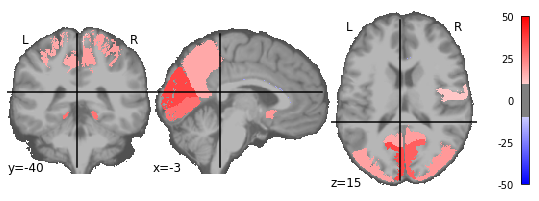

In [40]:
plotting.plot_stat_map(cambios_cerebro_control, bg_img=control_T1_nii, 
                       annotate=True, 
                       cmap="bwr",black_bg=False, cut_coords=(-3,-40,15), display_mode="ortho", 
                       threshold = 10, vmax=50)

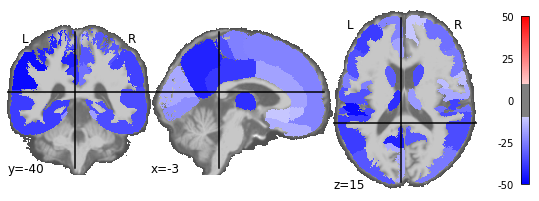

In [41]:
plotting.plot_stat_map(cambios_cerebro_CEUNIM, bg_img=CEUNIM_T1_nii, 
                       annotate=True, 
                       cmap="bwr",black_bg=False, cut_coords=(-3,-40,15), display_mode="ortho", 
                       threshold = 10, vmax=50)

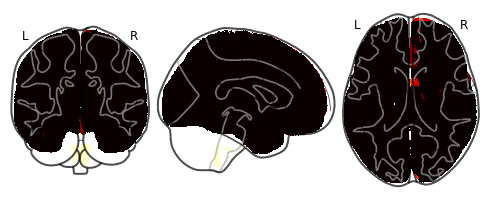

In [43]:
plotting.view_img_on_surf(cambios_cerebro_CEUNIM, threshold='90%', surf_mesh='fsaverage') 